In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
data= pd.read_csv('C:\\Users\\Rohan Jacob\\Desktop\\Datasets\\Banking subscription\\bank-additional-full.csv')

In [84]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


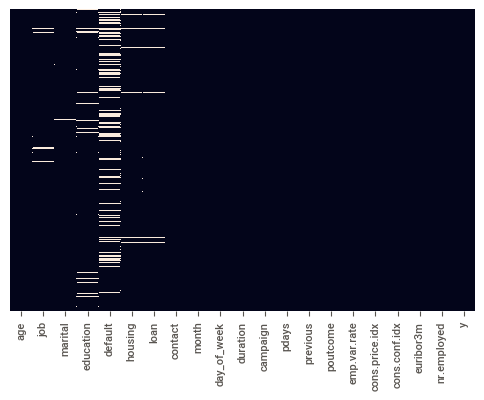

In [85]:
import seaborn as sns
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

In [86]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [88]:
data['default']=data['default'].fillna(data['default'].mode()[0])
data['education']=data['education'].fillna(data['education'].mode()[0])
data['housing']=data['housing'].fillna(data['housing'].mode()[0])
data['marital']=data['marital'].fillna(data['marital'].mode()[0])
data['education']=data['education'].fillna(data['education'].mode()[0])
data['loan']=data['loan'].fillna(data['loan'].mode()[0])
data['job']=data['job'].fillna(data['job'].mode()[0])

In [89]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [90]:
data['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [91]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
# smoker or not
le.fit(data.default.drop_duplicates()) 
data.default = le.transform(data.default)
#region
le.fit(data.housing.drop_duplicates()) 
data.housing = le.transform(data.housing)

le.fit(data.loan.drop_duplicates()) 
data.loan = le.transform(data.loan)

le.fit(data.contact.drop_duplicates()) 
data.contact = le.transform(data.contact)

le.fit(data.y.drop_duplicates())
data.y=le.transform(data.y)

In [92]:
data['job']=data['job'].map({'admin.':0,'blue-collar':1,
'technician':2,
'services': 3,
'management':4,
'retired': 5,
'entrepreneur':6 ,   
'self-employed':7,     
'housemaid':8,         
'unemployed':9,        
'student' :10}) 
data["education"]=data["education"].map({'university.degree':0,
'high.school': 1,
'basic.9y':2,
'professional.course':3,
'basic.4y' :4,
'basic.6y':5,  
'illiterate':6 })
data['marital']= data['marital'].map({'married' :0,'single':1,
'divorced':3})
data['day_of_week']=data['day_of_week'].map({'thu':3,
'mon':0,
'wed':2,
'tue':1,
'fri':4})

In [93]:
data['poutcome']=data['poutcome'].map({'failure':0,'nonexistent':1,'success':2})
data['month']=data['month'].map({'may':1,
'jul':3 ,
'aug':4 ,
'jun':2,
'nov':7,
'apr':0,
'oct':6,
'sep':5,
'mar':8 ,
'dec':9})

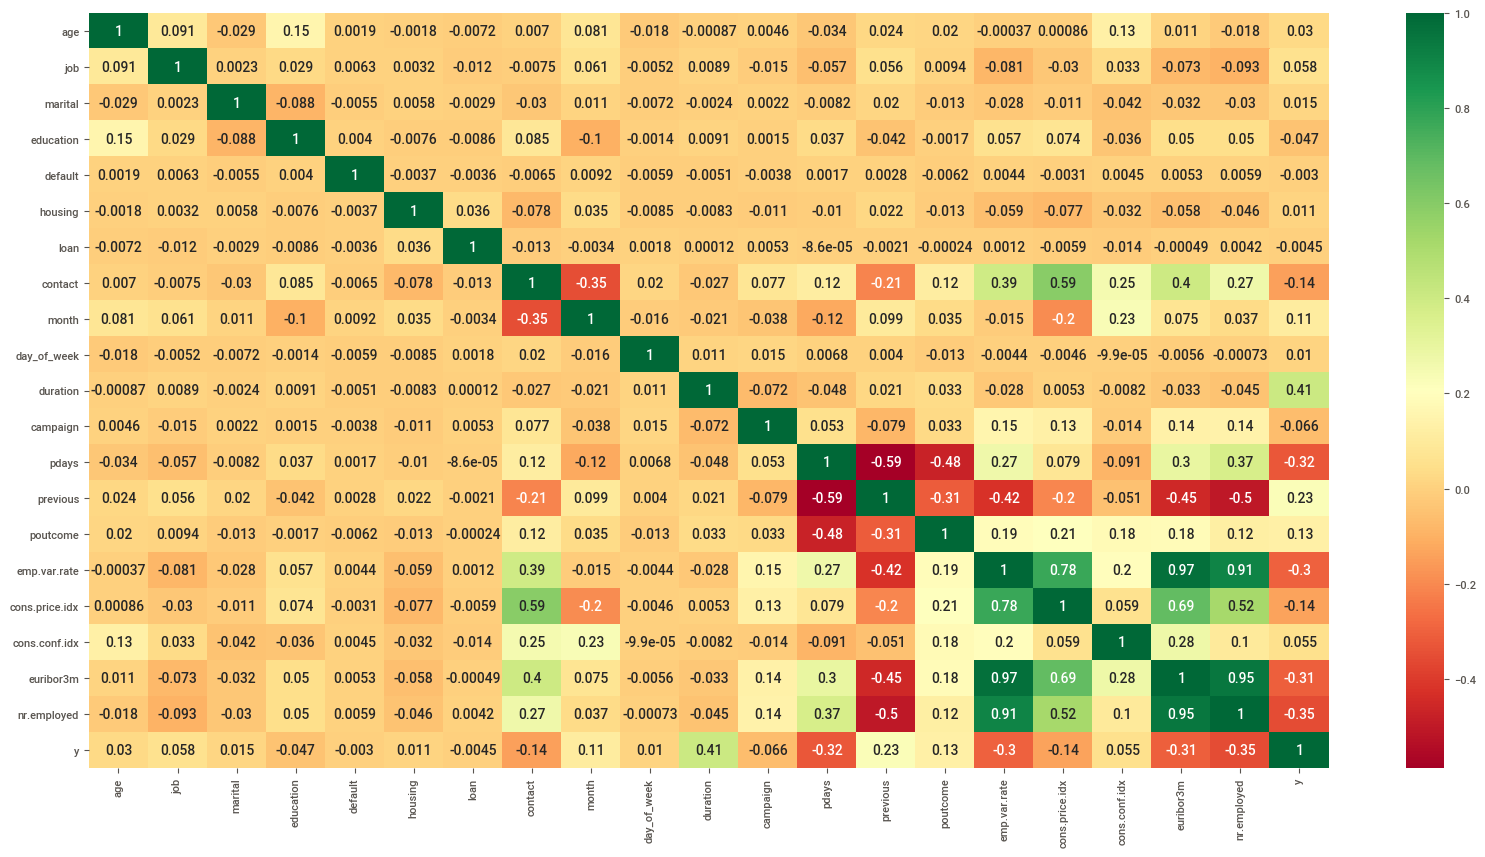

In [94]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True, cmap='RdYlGn')

In [95]:
data.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.427455,0.616782,1.592843,0.000073,0.547878,0.151695,0.365252,2.731621,1.979581,...,2.567593,962.475454,0.172963,0.930101,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,2.600579,0.953011,1.567091,0.008534,0.497708,0.358729,0.481507,2.101264,1.411514,...,2.770014,186.910907,0.494901,0.362886,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,999.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,...,2.000000,999.000000,0.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,4.000000,1.000000,3.000000,0.000000,1.000000,0.000000,1.000000,4.000000,3.000000,...,3.000000,999.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,10.000000,3.000000,6.000000,1.000000,1.000000,1.000000,1.000000,9.000000,4.000000,...,56.000000,999.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [96]:
data['job'].isnull().values.any()

False

In [97]:
import sweetviz
eda=sweetviz.analyze([data,"data"],target_feat='y')

:FEATURES DONE:                    |█████████████████████| [100%]   00:04  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:04  -> (00:00 left)


Creating Associations graph... DONE!


In [98]:
eda.show_html('Report.html')

In [99]:
data=data.rename(columns={"emp.var.rate": "empvarrate", "cons.price.idx": "conspriceidx","nr.employed":"nremployed"})

In [100]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
X=data[['loan','empvarrate','conspriceidx','euribor3m','nremployed']]
X=scaling.fit_transform(X)
y=data['y']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [101]:
## Hyper Parameter Optimization
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [102]:
## Implement Random Forest classifier
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   11.1s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   11.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [103]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [104]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

In [109]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.1, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=5, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train,y_train,cv=10)

In [110]:
score

array([0.89130435, 0.88768116, 0.89637681, 0.89492754, 0.88913043,
       0.88474085, 0.89561435, 0.887278  , 0.89271475, 0.894527  ])

In [111]:
score.mean()

0.8914295244548802

In [112]:
#Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [113]:
import numpy as np
classifier.fit(X_train,y_train)
ypred=classifier.predict(X_test)

In [114]:
classifier.predict([[0,1.1,93.9,4.857,5191]])

array([0])